# Problem Statement :

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

# AIM :

To build a new machine learning model for the car price evaluation from the scrapped data.

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
# To print all columns

pd.set_option('display.max_columns',None)

In [3]:
# Getting the dataset

df=pd.read_excel("Used_Cars.xlsx")

In [4]:
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


First we can drop the extra index column.

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head(1)

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh


Successfully dropped.

Now let's understand the various features of this dataset :

__Car_Name__ : Name of the car with year

__Fuel_type__ : Type of fuel used in car engine

__Running_in_kms__ : Total distance covered in kms till the date

__Endine_disp__ : Engine displacement/engine CC

__Gear_transmission__ : Type of gear transmission used in car

__Milage_in_km/ltr__ : Overall milage of car in Km/ltr

__Seating_cap__ : Number of seats in the car

__color__ : Color of the car

__Max_power__ : Maximum power of engine used in car in bhp

__front_brake_type__ : Type of brake system used for front-side wheels

__rear_brake_type__ : Type of brake system used for back-side wheels

__cargo_volume__ : The total cubic feet of space in a car's cargo area.

__height__ : Total height of car in mm

__width__ : Width of car in mm

__length__ : Total length of the car in mm

__Weight__ : Gross weight of the car in kg

__Insp_score__ : Inspection rating out of 10

__top_speed__ : Maximum speed limit of the car in km per hours

__City_url__ : Url of the page of cars from a particular city

__Car_price__ : Price of the car

# Exploratory Data Analysis :

In [7]:
# Checking the features of the dataset

df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

In [8]:
# Shape of the dataset

df.shape

(12608, 20)

___The dataset has 12608 rows and 20 columns.___

In [9]:
# Checking datatype of the dataset

df.dtypes

Car_Name             object
Fuel_type            object
Running_in_kms       object
Endine_disp          object
Gear_transmission    object
Milage_in_km/ltr     object
Seating_cap          object
color                object
Max_power            object
front_brake_type     object
rear_brake_type      object
cargo_volume         object
height               object
width                object
length               object
Weight               object
Insp_score           object
top_speed            object
City_url             object
Car_price            object
dtype: object

All the features are object datatype

In [10]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12608 non-null  object
 1   Fuel_type          12608 non-null  object
 2   Running_in_kms     12608 non-null  object
 3   Endine_disp        12608 non-null  object
 4   Gear_transmission  12608 non-null  object
 5   Milage_in_km/ltr   12608 non-null  object
 6   Seating_cap        12553 non-null  object
 7   color              12608 non-null  object
 8   Max_power          12607 non-null  object
 9   front_brake_type   12532 non-null  object
 10  rear_brake_type    12532 non-null  object
 11  cargo_volume       12161 non-null  object
 12  height             12552 non-null  object
 13  width              12552 non-null  object
 14  length             12552 non-null  object
 15  Weight             12571 non-null  object
 16  Insp_score         12608 non-null  objec

From here we can know that there are some null values in our dataset.

And memory used by the dataset is 1.9+ MB.

In [11]:
# Checking for null values in the dataset

df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap            55
color                   0
Max_power               1
front_brake_type       76
rear_brake_type        76
cargo_volume          447
height                 56
width                  56
length                 56
Weight                 37
Insp_score              0
top_speed            1798
City_url                0
Car_price               0
dtype: int64

In [12]:
# To check the value count of each feature

for i in df.columns:
        print(df[i].value_counts())
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

2015 Maruti Swift                  134
2018 Hyundai i20                   116
2015 Hyundai Grand i10             112
2014 Maruti Swift                  109
2018 Maruti Baleno                 106
                                  ... 
2016 Mahindra Bolero Power Plus      1
2012 Audi TT                         1
2012 Jaguar XJ                       1
2019 Honda BR-V                      1
2007 Maruti 800                      1
Name: Car_Name, Length: 1302, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Petrol      7056
Diesel      5422
CNG           92
LPG           27
Electric      11
Name: Fuel_type, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
60,000 kms      142
65,000 kms      139
70,000 kms      138
80,000 kms      119
40,000 kms      106
               ... 
31,804 kms        1
27,881 kms        1
32,500 kms        1
42,599 kms        1
1,03,292 kms      1
Name: Running_in_kms, Length: 4581, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Here we can observe that there are many '-' values and null values too. So lets replace them with NaN.

In [13]:
import numpy as np

In [14]:
df.replace('-',np.nan,inplace=True)
df.replace('null',np.nan,inplace=True)

In [15]:
df.isnull().sum()

Car_Name                 0
Fuel_type                0
Running_in_kms           0
Endine_disp             60
Gear_transmission        0
Milage_in_km/ltr        29
Seating_cap            104
color                  274
Max_power               78
front_brake_type       214
rear_brake_type        215
cargo_volume          8388
height                 254
width                  255
length                 254
Weight                6074
Insp_score           10876
top_speed             4316
City_url                 0
Car_price                0
dtype: int64

From here we can observe that, "cargo_volume" and "Insp_score" are having more than 50% null values. Hence we can drop them.

In [16]:
df.drop(["cargo_volume","Insp_score"],axis=1,inplace=True)

In [17]:
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'height', 'width',
       'length', 'Weight', 'top_speed', 'City_url', 'Car_price'],
      dtype='object')

Successfully dropped.

In [18]:
import seaborn as sns

<AxesSubplot:>

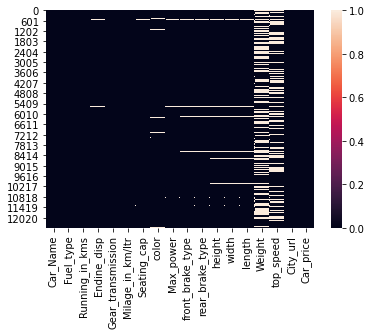

In [19]:
sns.heatmap(df.isnull())

From the visualization also we can see there are lots of null values and needs to be handled, but before that we have to do the required feature engineering.

# Feature Engineering :

In [20]:
df.head()

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price
0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,1520,1660,3765,NaN,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,1467,1699,4390,1750,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,1564,1520,3565,1170,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,1700,1495,3599,1350,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


__Car_Name :__

Starting with "Car_Name" column, it consists of manufacturing year, car brand and model. We need to extract these 3 features separately.

In [21]:
# Extracting manufacturing year

df['Manu_year']=df['Car_Name'].str[0:4]

In [22]:
# Extracting car brand

df['Car_brand']=df['Car_Name'].str[4:]

In [23]:
df.head()

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price,Manu_year,Car_brand
0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh,2014,Maruti Wagon R
1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,1520,1660,3765,NaN,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh,2015,Hyundai Grand i10
2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,1467,1699,4390,1750,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh,2018,Volkswagen Vento
3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,1564,1520,3565,1170,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh,2019,Maruti S-Presso
4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,1700,1495,3599,1350,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh,2017,Maruti Wagon R


Now we can drop the 'Car_Name' column.

In [24]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [25]:
df.head(1)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price,Manu_year,Car_brand
0,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh,2014,Maruti Wagon R


Successfully dropped.

Now, in the 'Car_brand' column, it consists of car brand and car model, and we need to separate both the features.

In [26]:
df['Car_Brand'] = df.Car_brand.str.split(' ').str.get(1)
df['Car_Model'] = df.Car_brand.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')

In [27]:
df.head(1)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price,Manu_year,Car_brand,Car_Brand,Car_Model
0,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh,2014,Maruti Wagon R,Maruti,Wagon R


Two separate columns are added for car brand and car model, hence we can delete the earlier "Car_brand" column.

In [28]:
df.drop(['Car_brand'],axis=1,inplace=True)

In [29]:
df.head(1)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price,Manu_year,Car_Brand,Car_Model
0,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh,2014,Maruti,Wagon R


Successfully dropped.

__Running_in_kms :__

In [30]:
df.Running_in_kms

0        1,31,125 kms
1          73,875 kms
2          97,922 kms
3          24,230 kms
4          41,174 kms
             ...     
12603      80,000 kms
12604      55,000 kms
12605      40,000 kms
12606      15,000 kms
12607      50,000 kms
Name: Running_in_kms, Length: 12608, dtype: object

This feature has both string and numeric value and some ',' too. Hence it needs to be cleaned.

In [31]:
df['Running_in_kms']=df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms']=df['Running_in_kms'].str.replace(',','')
df['Running_in_kms']=df['Running_in_kms'].str.replace('1 Lakh ','100000')

In [32]:
df.Running_in_kms

0        131125 
1         73875 
2         97922 
3         24230 
4         41174 
          ...   
12603     80000 
12604     55000 
12605     40000 
12606     15000 
12607     50000 
Name: Running_in_kms, Length: 12608, dtype: object

Successfully cleaned. 

In [33]:
# Changing datatype of "Running_in_kms"

df['Running_in_kms'] = df['Running_in_kms'].astype('float')

In [34]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__Endine_disp :__

In [35]:
# Required to change the datatype of "Engine_disp" as it is a numeric column

df.Endine_disp=df.Endine_disp.astype('float')

In [36]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__Milage_in_km/ltr :__

This feature has both string and numeric value and some ',' too. Hence it needs to be cleaned.

In [37]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

In [38]:
df.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price,Manu_year,Car_Brand,Car_Model
0,Petrol,131125.0,998.0,Manual,21.79,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh,2014,Maruti,Wagon R
1,Petrol,73875.0,1197.0,Manual,18.9,5,White,82,Disc,Drum,1520,1660,3765,NaN,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh,2015,Hyundai,Grand i10
2,Diesel,97922.0,1498.0,Manual,22.27,5,White,108.6,Ventilated Disc,Drum,1467,1699,4390,1750,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh,2018,Volkswagen,Vento
3,Petrol,24230.0,998.0,Manual,21.7,5,Red,67.05,Ventilated Disc,Drum,1564,1520,3565,1170,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh,2019,Maruti,S-Presso
4,Petrol,41174.0,998.0,Automatic,20.51,5,Grey,67,Ventilated Disc,Drum,1700,1495,3599,1350,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh,2017,Maruti,Wagon R


Successfully cleaned.

In [39]:
# Changing datatype of Milage_in_km/ltr

df['Milage_in_km/ltr']=df['Milage_in_km/ltr'].astype('float')

In [40]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__Max_power :__

In [41]:
df.Max_power.value_counts()

74         388
81.80      344
67.05      313
88.5       249
74         228
          ... 
65.39        1
181.04       1
178.3        1
156          1
60.2         1
Name: Max_power, Length: 571, dtype: int64

This feature has both numeric and string values. Hence it needs to be cleaned.

In [42]:
df['Max_power'] = df['Max_power'].str[0:5]
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','') 

In [43]:
df['Max_power'].fillna(0.0,inplace=True)

In [44]:
print (df.loc[pd.to_numeric(df['Max_power'], errors='coerce').isna(), 'Max_power'])

180      null 
219      null 
280      null 
302      null 
344      null 
         ...  
11912    null 
12044    null 
12047    null 
12125    null 
12494    null 
Name: Max_power, Length: 67, dtype: object


In [45]:
df['Max_power'] = pd.to_numeric(df['Max_power'], errors='coerce')

In [46]:
df['Max_power']=df['Max_power'].fillna(df['Max_power'].mean())

In [47]:
# Changing the datatype of "Max_power"

df.Max_power = df.Max_power.astype('float')

In [48]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__front_brake_type :__

In [49]:
df.front_brake_type.value_counts()

Disc                                        6902
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Discs                                          6
Disc,internally ventilated                     6
Disc, 236 mm                                   5
disc                                           4
Ventillated Disc    

Here we can observe that there are many repeated values, we can merge them into one class.

In [50]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

In [51]:
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [52]:
df.front_brake_type.value_counts()

Disc                                        7171
Ventilated Disc                             5070
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Carbon ceramic                                 2
Mechanical-hydraulic dual circuit              1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Ventilated & Grooved Steel Discs               1
Name: front_brake_type, dtype: int64

Successfully merged.

__rear_brake_type :__

In [53]:
df.rear_brake_type.value_counts()

Drum                                        10022
Disc                                         1409
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Self Adjusting Drum                            12
Disc & Drum                                    12
Electric Parking Brake                         11
Ventilated Drum                                 8
Leading & Trailing Drum                         8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


Here we can observe that there are many repeated values, we can merge them into one class.

In [54]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)

In [55]:
df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

In [56]:
df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

In [57]:
df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

In [58]:
df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

In [59]:
df.rear_brake_type.value_counts()

Drum                                        10055
Disc                                         1659
Ventilated Disc                               357
Leading-Trailing Drum                         111
Disc & Caliper Type                            83
Self-Adjusting Drum                            69
262mm Disc & Drum Combination                  13
Disc & Drum                                    12
Electric Parking Brake                         11
Ventilated Drum                                 8
Vacuum assisted hydraulic dual circuit w        7
Carbon ceramic                                  2
Booster assisted drum                           2
Mechanical-hydraulic dual circuit               1
Dual Circuit with ABS, ABS with BAS             1
228.6 mm dia, drums on rear wheels              1
Ventilated & Grooved Steel Discs                1
Name: rear_brake_type, dtype: int64

Successfully merged.

__height :__

In [60]:
df.height.value_counts()

1530     791
1505     753
1475     723
1520     609
1510     440
        ... 
1699       1
1786       1
1487       1
1301       1
1441       1
Name: height, Length: 291, dtype: int64

There are ',' in this feature and needs to be cleaned.

In [61]:
df['height']=df['height'].str.replace(',','')
df['height']=df['height'].str[0:4]

In [62]:
df.height.value_counts()

1505    886
1530    798
1475    727
1520    609
1510    440
       ... 
1885      1
1709      1
1870      1
1444      1
1916      1
Name: height, Length: 241, dtype: int64

Successfully cleaned.

In [63]:
# Changing the datatype of height

df.height=df.height.astype('float')

In [64]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__width :__

In [65]:
df.width.value_counts()

1695      1285
1735       736
1660       569
1680       491
1734       474
          ... 
1,772        1
1902         1
2111         1
2052         1
1832         1
Name: width, Length: 273, dtype: int64

There are ',' in this feature and needs to be cleaned.

In [66]:
df['width']=df['width'].str.replace(',','')

In [67]:
df.width.value_counts()

1695    1285
1735     736
1660     569
1680     491
1734     474
        ... 
2025       1
2029       1
2134       1
1980       1
1832       1
Name: width, Length: 267, dtype: int64

Successfully cleaned.

In [68]:
# Changing datatype of width

df.width = df.width.astype('float')

In [69]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__length :__

In [70]:
df.length.value_counts()

3995     1527
3840      469
3765      452
3985      445
4440      434
         ... 
4939        1
4324        1
4870        1
4491        1
4749        1
Name: length, Length: 367, dtype: int64

There are ',' in this feature and needs to be cleaned.

In [71]:
df['length']=df['length'].str.replace(',','')

In [72]:
df.length.value_counts()

3995     1527
3840      469
3765      452
3985      445
4440      434
         ... 
3991        1
5212        1
4767        1
4150        1
4324        1
Name: length, Length: 365, dtype: int64

Successfully cleaned.

In [73]:
# Changing the datatype of "length"

df.length=df.length.astype('float')

In [74]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__Weight :__

In [75]:
df.Weight.value_counts()

1340     443
1680     281
1185     276
1350     257
1505     256
        ... 
1895       1
2050       1
1390       1
1830       1
1080       1
Name: Weight, Length: 285, dtype: int64

There are ',' and strings in the feature, which needs to be cleaned.

In [76]:
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

In [77]:
df.Weight.value_counts()

1340    443
1315    323
1405    309
1680    289
1185    276
       ... 
2665      1
1615      1
2945      1
2400      1
2155      1
Name: Weight, Length: 230, dtype: int64

Successfully cleaned.

In [78]:
# Changing the datatype of Weight

df.Weight=df.Weight.astype('float')

In [79]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__top_speed :__

In [80]:
df.top_speed.value_counts()

165 Kmph      463
170 Kmph      457
180 Kmph      363
145 Kmph      251
190 kmph      235
             ... 
128.84kmph      1
244 Kmph        1
239 Kmph        1
183 kmph        1
185             1
Name: top_speed, Length: 294, dtype: int64

This feature consists of strings, and numerical values needs to be extracted.

In [81]:
df['top_speed']=df['top_speed'].str[0:3]

In [82]:
df.top_speed.value_counts()

165    621
160    530
190    505
170    474
172    402
      ... 
290      1
139      1
252      1
129      1
239      1
Name: top_speed, Length: 120, dtype: int64

Successfully extracted.

In [83]:
# Changing the datatype of "top_speed"

df.top_speed=df.top_speed.astype('float')

In [84]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

Successfully changed.

__City_url :__

In [85]:
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1239
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

Here in this feature we have links, and we need to extract only the city names from the links.

In [86]:
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'Mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'Hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'Pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'Delhi-NCR')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'Ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'Gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'Noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'Kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'Jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'New-delhi')

In [87]:
df.city_name.value_counts()

Delhi-NCR    1490
Bangalore    1486
Mumbai       1478
New-delhi    1473
Pune         1239
Gurgaon      1040
Noida         982
Hyderabad     918
Chennai       836
Kolkata       595
Ahmedabad     579
Jaipur        492
Name: city_name, dtype: int64

And now we can drop the "City_url" column.

In [88]:
df.drop(['City_url'],axis=1,inplace=True)

In [89]:
df.head(1)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_price,Manu_year,Car_Brand,Car_Model,city_name
0,Petrol,131125.0,998.0,Manual,21.79,5,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,NaN,2.94 Lakh,2014,Maruti,Wagon R,Ahmedabad


Successfully dropped.

__Car_price :__

In [90]:
df.Car_price.value_counts()

5.5 Lakh      140
4.5 Lakh      128
4.25 Lakh     126
6.5 Lakh      121
3.5 Lakh      116
             ... 
85.95 Lakh      1
10.91 Lakh      1
5.42 Lakh       1
27.95 Lakh      1
25.93 Lakh      1
Name: Car_price, Length: 1227, dtype: int64

In our target, it consists of strings like 'Lakh' and 'Crores'. We need to clean them and get the actual price amount.

In [91]:
# Replacing Lakh and Cr with its integers in a new column

df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

In [92]:
df.car_price

0        2.94 100000
1         4.8 100000
2        7.11 100000
3        4.22 100000
4         4.3 100000
            ...     
12603      18 100000
12604      35 100000
12605     7.5 100000
12606    7.25 100000
12607     2.5 100000
Name: car_price, Length: 12608, dtype: object

Successfully replaced.

In [93]:
# Splitting this new column into 'a' and 'b'

df[['a','b']] = df.car_price.str.split(expand=True)

In [94]:
df.head(1)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_price,Manu_year,Car_Brand,Car_Model,city_name,car_price,a,b
0,Petrol,131125.0,998.0,Manual,21.79,5,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,NaN,2.94 Lakh,2014,Maruti,Wagon R,Ahmedabad,2.94 100000,2.94,100000


Successfully splitted.

In [95]:
# Changing the datatypes of 'a' and 'b'

df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [96]:
# To check null values in 'a' and 'b' columns

df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power               0
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
Car_price               0
Manu_year               0
Car_Brand               0
Car_Model               0
city_name               0
car_price               0
a                       0
b                      91
dtype: int64

There are null values in column 'b'.

In [97]:
df['b']=df['b'].fillna(value=1)

In [98]:
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power               0
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
Car_price               0
Manu_year               0
Car_Brand               0
Car_Model               0
city_name               0
car_price               0
a                       0
b                       0
dtype: int64

Null values in 'b' are handled.

In [99]:
# Multiplying column 'a' and 'b' to get the actual price

df['car_price']=df['a'] * df['b']

In [100]:
df.car_price

0         294000.0
1         480000.0
2         711000.0
3         422000.0
4         430000.0
           ...    
12603    1800000.0
12604    3500000.0
12605     750000.0
12606     725000.0
12607     250000.0
Name: car_price, Length: 12608, dtype: float64

We got the prices successfully and can drop 'Car_price', 'a' and 'b' columns.

In [101]:
df.drop(['Car_price', 'a', 'b'],axis=1,inplace=True)

In [102]:
df.head(1)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Manu_year,Car_Brand,Car_Model,city_name,car_price
0,Petrol,131125.0,998.0,Manual,21.79,5,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,NaN,2014,Maruti,Wagon R,Ahmedabad,294000.0


Successfully dropped.

In [103]:
# Rechecking the datatypes

df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap           object
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Manu_year             object
Car_Brand             object
Car_Model             object
city_name             object
car_price            float64
dtype: object

So now there are both float and object datatypes.

# Handling null values :

In [104]:
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power               0
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
Manu_year               0
Car_Brand               0
Car_Model               0
city_name               0
car_price               0
dtype: int64

In [105]:
# Checking skewness

df.skew()

Running_in_kms      7.906142
Endine_disp         1.895318
Milage_in_km/ltr   -0.511076
Seating_cap         2.444332
Max_power           2.796354
height              0.955643
width               0.800815
length              0.434823
Weight              1.032898
top_speed           0.896381
Manu_year          -0.723524
car_price           9.610453
dtype: float64

_So, the numerical columns which has null values, as well as skewness, the null values needs to be replaced by its median._

_And the rest of the null values in numerical and categorical columns will be replaced with their mean and mode respectively._

In [106]:
# Replacing null values in skewed numerical columns with its median

for col in ['Endine_disp','Milage_in_km/ltr','Max_power','height','width','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].median())

In [107]:
# Replacing null values in normal numerical columns with its mean

for col in ['length']:
    df[col] = df[col].fillna(df[col].mean())

In [108]:
# Replacing null values in categorical columns with its mode

for col1 in ['Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [109]:
# Rechecking the null values

df.isnull().sum()

Fuel_type            0
Running_in_kms       0
Endine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Weight               0
top_speed            0
Manu_year            0
Car_Brand            0
Car_Model            0
city_name            0
car_price            0
dtype: int64

Hence all the null values are removed.

We can visualize and check : 

<AxesSubplot:>

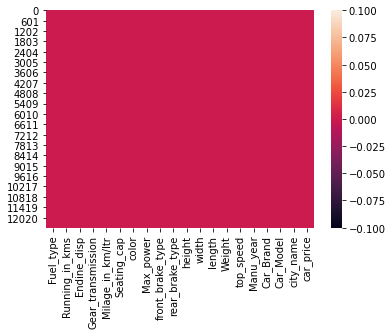

In [110]:
sns.heatmap(df.isnull())

Successfully handled all the null values.

In [120]:
# Final dataset

df.head(10)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Manu_year,Car_Brand,Car_Model,city_name,car_price
0,Petrol,131125.0,998.0,Manual,21.79,5,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,2014,Maruti,Wagon R,Ahmedabad,294000.0
1,Petrol,73875.0,1197.0,Manual,18.90,5,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,2015,Hyundai,Grand i10,Ahmedabad,480000.0
2,Diesel,97922.0,1498.0,Manual,22.27,5,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,2018,Volkswagen,Vento,Ahmedabad,711000.0
3,Petrol,24230.0,998.0,Manual,21.70,5,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,2019,Maruti,S-Presso,Ahmedabad,422000.0
4,Petrol,41174.0,998.0,Automatic,20.51,5,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,2017,Maruti,Wagon R,Ahmedabad,430000.0
5,Petrol,57341.0,1196.0,Manual,16.11,5,White,72.42,Disc,Drum,1825.0,1475.0,3675.0,1510.0,169.0,2012,Maruti,Eeco,Ahmedabad,279000.0
6,Petrol,38647.0,1497.0,Manual,17.00,5,Other,118.00,Disc,Drum,1480.0,1695.0,4420.0,1520.0,169.0,2011,Honda,City,Ahmedabad,399000.0
7,Petrol,17116.0,1196.0,Manual,16.11,5,White,72.42,Disc,Drum,1825.0,1475.0,3675.0,1510.0,169.0,2020,Maruti,Eeco,Ahmedabad,472000.0
8,Petrol,45347.0,1196.0,Manual,15.37,5,White,73.00,Ventilated Disc,Drum,1800.0,1475.0,3675.0,1510.0,145.0,2016,Maruti,Eeco,Ahmedabad,381000.0
9,Petrol,45203.0,1197.0,Manual,20.40,5,White,81.80,Ventilated Disc,Drum,1530.0,1735.0,3840.0,1315.0,165.0,2016,Maruti,Swift,Ahmedabad,464000.0


So this is our final dataset which we achieved after all the cleaning.

# Univariate Analysis :

In [128]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

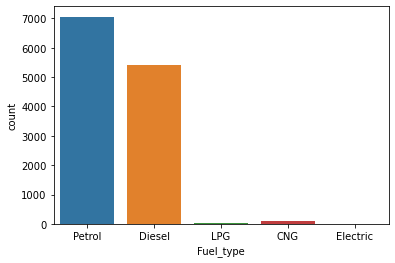

In [111]:
sns.countplot(df['Fuel_type'])

Most of the used cars run on petrol and diesel.

<AxesSubplot:xlabel='Running_in_kms', ylabel='Density'>

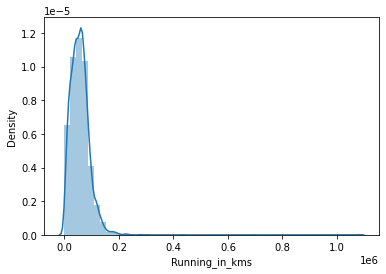

In [112]:
sns.distplot(df['Running_in_kms'])

This feature has skewness, and it is right skewness.

<AxesSubplot:xlabel='Endine_disp', ylabel='Density'>

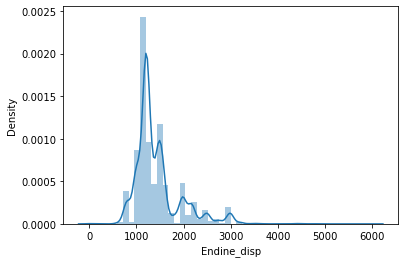

In [114]:
sns.distplot(df['Endine_disp'])

The egine displacement in used cars ranges from 1000 to 3000, and it also has some skewness. It is right skewed.

<AxesSubplot:xlabel='Gear_transmission', ylabel='count'>

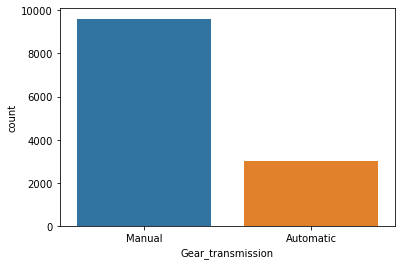

In [116]:
sns.countplot(df['Gear_transmission'])

Most of the used cars have manual gears.

<AxesSubplot:xlabel='Milage_in_km/ltr', ylabel='Density'>

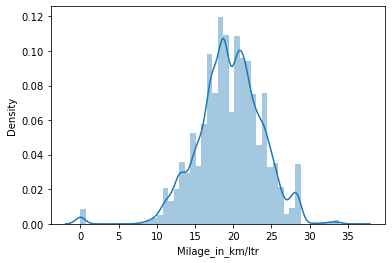

In [117]:
sns.distplot(df['Milage_in_km/ltr'])

Most of the used cars have a mileage of 18 to 22km/ltr.

<AxesSubplot:xlabel='Seating_cap', ylabel='count'>

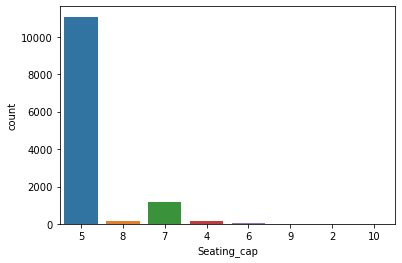

In [121]:
sns.countplot(df['Seating_cap'])

Most of the used used cars have a seating capacity of 5 people.

<AxesSubplot:xlabel='Max_power', ylabel='Density'>

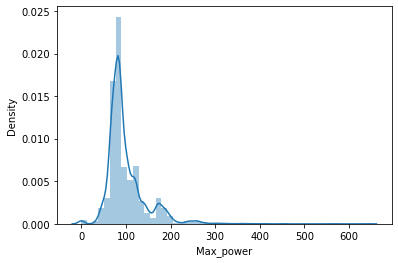

In [124]:
sns.distplot(df['Max_power'])

Maximum power of engine used in car in bhp is around 100. This feature also has some skewness, it is right skewed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Disc'),
  Text(1, 0, 'Ventilated Disc'),
  Text(2, 0, 'Disc & Caliper Type'),
  Text(3, 0, 'Multilateral Disc'),
  Text(4, 0, 'Carbon ceramic'),
  Text(5, 0, 'Drum'),
  Text(6, 0, 'Electric Parking Brake'),
  Text(7, 0, 'Disc & Drum'),
  Text(8, 0, 'Vacuum assisted hydraulic dual circuit w'),
  Text(9, 0, 'Mechanical-hydraulic dual circuit'),
  Text(10, 0, 'Ventilated & Grooved Steel Discs'),
  Text(11, 0, 'Dual Circuit with ABS, ABS with BAS'),
  Text(12, 0, 'Tandem master cylinder with Servo assist')])

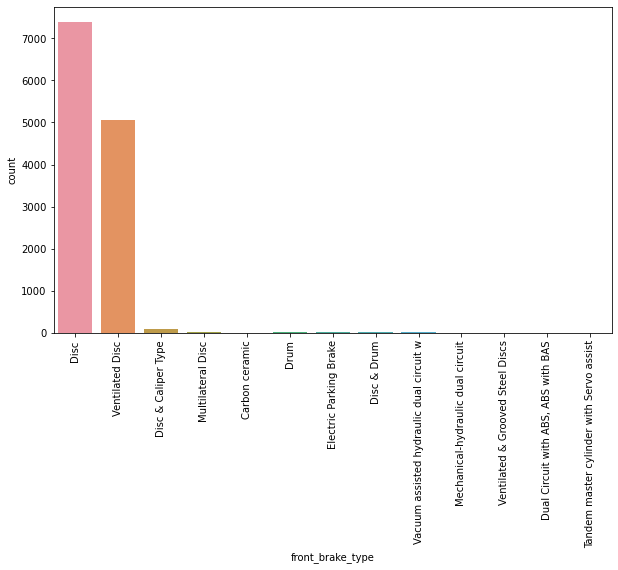

In [129]:
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=90)

Type of brake system used for front-side wheels is disc type and ventilated disc, in most used cars.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Drum'),
  Text(1, 0, 'Disc'),
  Text(2, 0, 'Leading-Trailing Drum'),
  Text(3, 0, 'Disc & Caliper Type'),
  Text(4, 0, 'Ventilated Disc'),
  Text(5, 0, 'Self-Adjusting Drum'),
  Text(6, 0, 'Ventilated Drum'),
  Text(7, 0, 'Disc & Drum'),
  Text(8, 0, '262mm Disc & Drum Combination'),
  Text(9, 0, 'Carbon ceramic'),
  Text(10, 0, 'Electric Parking Brake'),
  Text(11, 0, 'Vacuum assisted hydraulic dual circuit w'),
  Text(12, 0, 'Mechanical-hydraulic dual circuit'),
  Text(13, 0, 'Booster assisted drum'),
  Text(14, 0, 'Ventilated & Grooved Steel Discs'),
  Text(15, 0, 'Dual Circuit with ABS, ABS with BAS'),
  Text(16, 0, '228.6 mm dia, drums on rear wheels')])

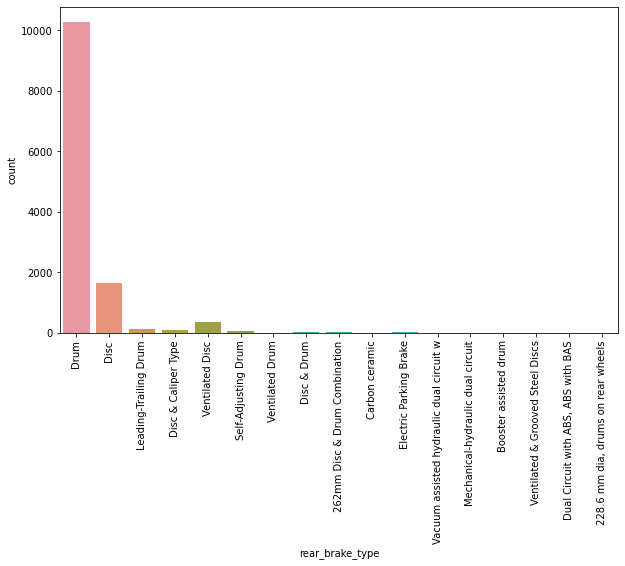

In [130]:
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=90)

Type of brake system used for back-side wheels, is mostly drum type.

<AxesSubplot:xlabel='height', ylabel='Density'>

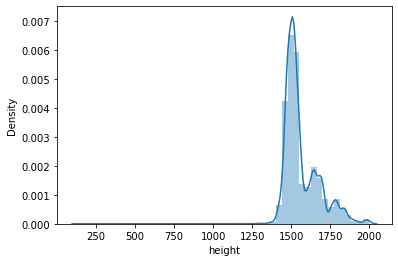

In [131]:
sns.distplot(df['height'])

Most of the used cars have a height of around 1500 mm, that is approx 5 ft.

<AxesSubplot:xlabel='width', ylabel='Density'>

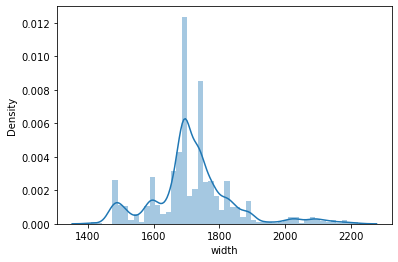

In [132]:
sns.distplot(df['width'])

Most of the used cars have a width of around 1700 mm, that is approx 6 ft.

<AxesSubplot:xlabel='length', ylabel='Density'>

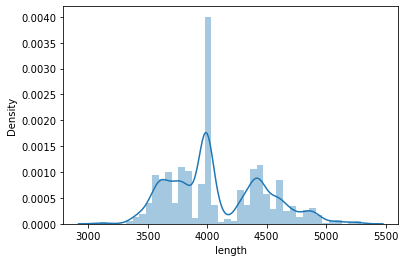

In [133]:
sns.distplot(df['length'])

Most of the used cars have a length of around 4000 mm, that is approx 13 ft.

<AxesSubplot:xlabel='Weight', ylabel='Density'>

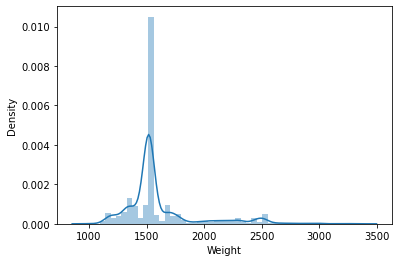

In [134]:
sns.distplot(df['Weight'])

Gross weight of the used cars are mostly around 1500 kg.

<AxesSubplot:xlabel='top_speed', ylabel='Density'>

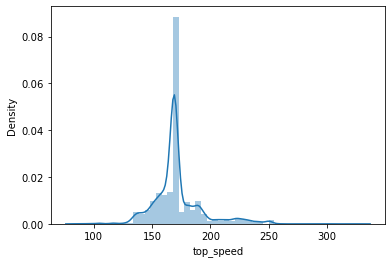

In [135]:
sns.distplot(df['top_speed'])

Maximum speed limit of the used cars is around 160 to 170 km per hours

<AxesSubplot:xlabel='Manu_year', ylabel='Density'>

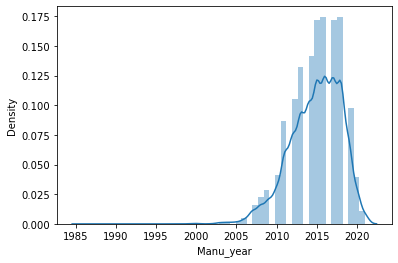

In [137]:
sns.distplot(df['Manu_year'])

Most of the used cars were manufactured in the years between 2014 to 2019.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Volkswagen'),
  Text(3, 0, 'Honda'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Chevrolet'),
  Text(9, 0, 'Mercedes-Benz'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Audi'),
  Text(12, 0, 'Jaguar'),
  Text(13, 0, 'Datsun'),
  Text(14, 0, 'Volvo'),
  Text(15, 0, 'Renault'),
  Text(16, 0, 'Jeep'),
  Text(17, 0, 'Tata'),
  Text(18, 0, 'Mini'),
  Text(19, 0, 'Kia'),
  Text(20, 0, 'Porsche'),
  Text(21, 0, 'Skoda'),
  Text(22, 0, 'Land'),
  Text(23, 0, 'MG'),
  Text(24, 0, 'Fiat'),
  Text(25, 0, 'Force'),
  Text(26, 0, 'Mitsubishi'),
  Text(27, 0, 'Lamborghini'),
  Text(28, 0, 'Isuzu'),
  Text(29, 0, 'Ambassador'),
  Text(30, 0, 'Lexus'),
  Text(31, 0, 'Bentley'),
  Text(32, 0, 'OpelCorsa'),
  Text(33, 0,

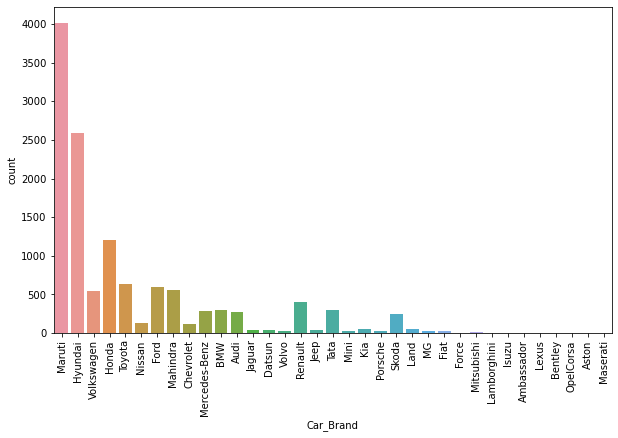

In [138]:
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90)

Most of the used cars are from the company of Maruti and Hyundai.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Delhi-NCR'),
  Text(4, 0, 'Gurgaon'),
  Text(5, 0, 'Hyderabad'),
  Text(6, 0, 'Jaipur'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Mumbai'),
  Text(9, 0, 'New-delhi'),
  Text(10, 0, 'Noida'),
  Text(11, 0, 'Pune')])

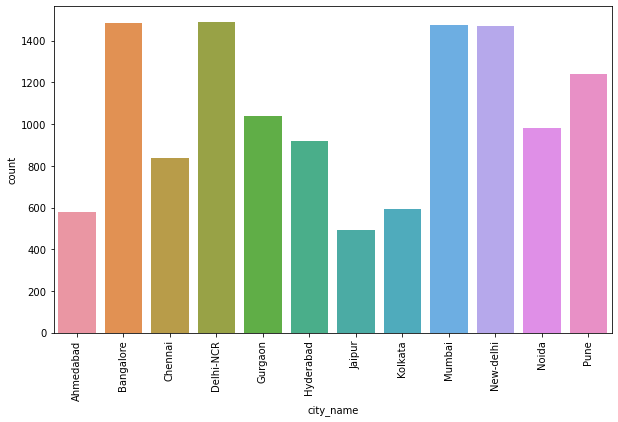

In [139]:
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'])
plt.xticks(rotation=90)

Mostly used cars are purchased in Bangalore, Delhi and Mumbai cities.

<AxesSubplot:xlabel='car_price', ylabel='Density'>

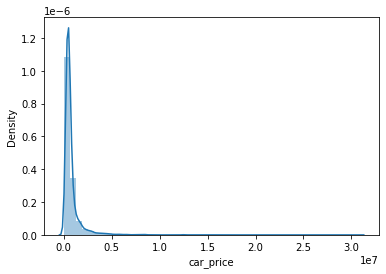

In [140]:
sns.distplot(df['car_price'])

This feature has right skewness.

# Bivariate Analysis :

<AxesSubplot:xlabel='Fuel_type', ylabel='car_price'>

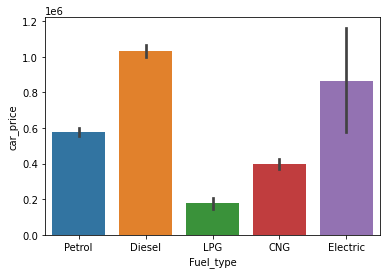

In [142]:
sns.barplot(y=df['car_price'],x=df['Fuel_type'])

Prices are highest for Diesel and Electric cars.

<AxesSubplot:xlabel='Running_in_kms', ylabel='car_price'>

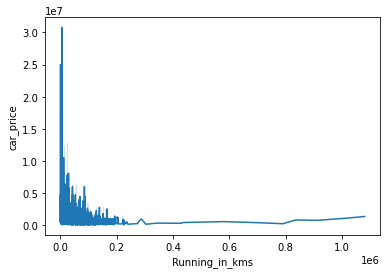

In [145]:
sns.lineplot(x=df['Running_in_kms'] , y=df['car_price'], data=df)

Car price is highest for less driven cars.

<AxesSubplot:xlabel='Endine_disp', ylabel='car_price'>

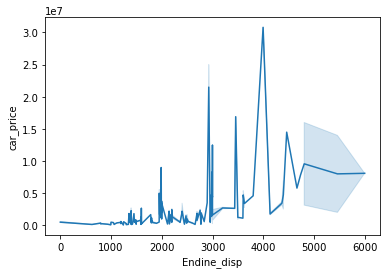

In [146]:
sns.lineplot(x=df['Endine_disp'] , y=df['car_price'], data=df)

Car price is highest for 4000 Endine_disp.

<AxesSubplot:xlabel='Gear_transmission', ylabel='car_price'>

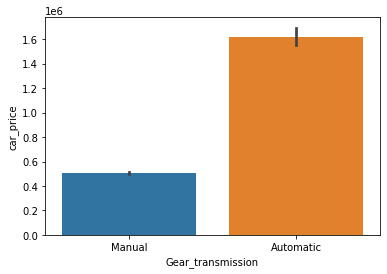

In [147]:
sns.barplot(y=df['car_price'],x=df['Gear_transmission'])

Automatic gear cars very high in prices.

<AxesSubplot:xlabel='Milage_in_km/ltr', ylabel='car_price'>

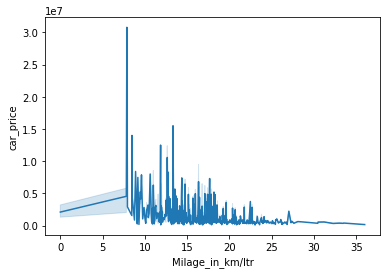

In [148]:
sns.lineplot(x=df['Milage_in_km/ltr'] , y=df['car_price'], data=df)

Cars with mileage of around 7 to 8 km/ltr are having the highest prices.

<AxesSubplot:xlabel='Seating_cap', ylabel='car_price'>

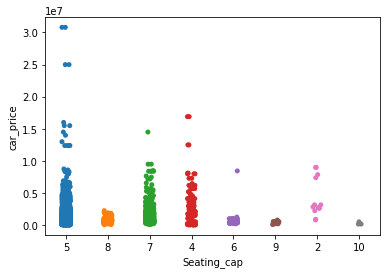

In [150]:
sns.stripplot(y=df['car_price'],x=df['Seating_cap'])

Cars with seating capacity 5 has the highest price.

<AxesSubplot:xlabel='Max_power', ylabel='car_price'>

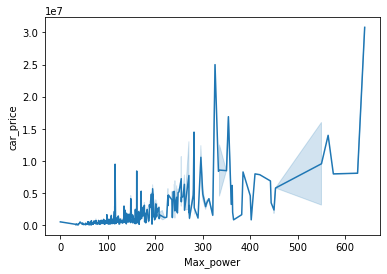

In [151]:
sns.lineplot(x=df['Max_power'] , y=df['car_price'], data=df)

Prices increases as the engine power increases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Disc'),
  Text(1, 0, 'Ventilated Disc'),
  Text(2, 0, 'Disc & Caliper Type'),
  Text(3, 0, 'Multilateral Disc'),
  Text(4, 0, 'Carbon ceramic'),
  Text(5, 0, 'Drum'),
  Text(6, 0, 'Electric Parking Brake'),
  Text(7, 0, 'Disc & Drum'),
  Text(8, 0, 'Vacuum assisted hydraulic dual circuit w'),
  Text(9, 0, 'Mechanical-hydraulic dual circuit'),
  Text(10, 0, 'Ventilated & Grooved Steel Discs'),
  Text(11, 0, 'Dual Circuit with ABS, ABS with BAS'),
  Text(12, 0, 'Tandem master cylinder with Servo assist')])

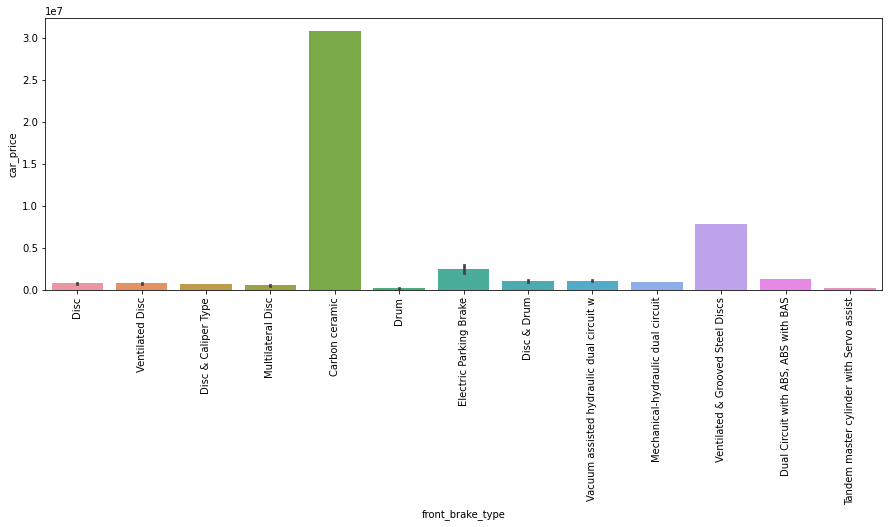

In [158]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['car_price'],x=df['front_brake_type'])
plt.xticks(rotation=90)

Cars which have carbon ceramic front brake are highest in price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Drum'),
  Text(1, 0, 'Disc'),
  Text(2, 0, 'Leading-Trailing Drum'),
  Text(3, 0, 'Disc & Caliper Type'),
  Text(4, 0, 'Ventilated Disc'),
  Text(5, 0, 'Self-Adjusting Drum'),
  Text(6, 0, 'Ventilated Drum'),
  Text(7, 0, 'Disc & Drum'),
  Text(8, 0, '262mm Disc & Drum Combination'),
  Text(9, 0, 'Carbon ceramic'),
  Text(10, 0, 'Electric Parking Brake'),
  Text(11, 0, 'Vacuum assisted hydraulic dual circuit w'),
  Text(12, 0, 'Mechanical-hydraulic dual circuit'),
  Text(13, 0, 'Booster assisted drum'),
  Text(14, 0, 'Ventilated & Grooved Steel Discs'),
  Text(15, 0, 'Dual Circuit with ABS, ABS with BAS'),
  Text(16, 0, '228.6 mm dia, drums on rear wheels')])

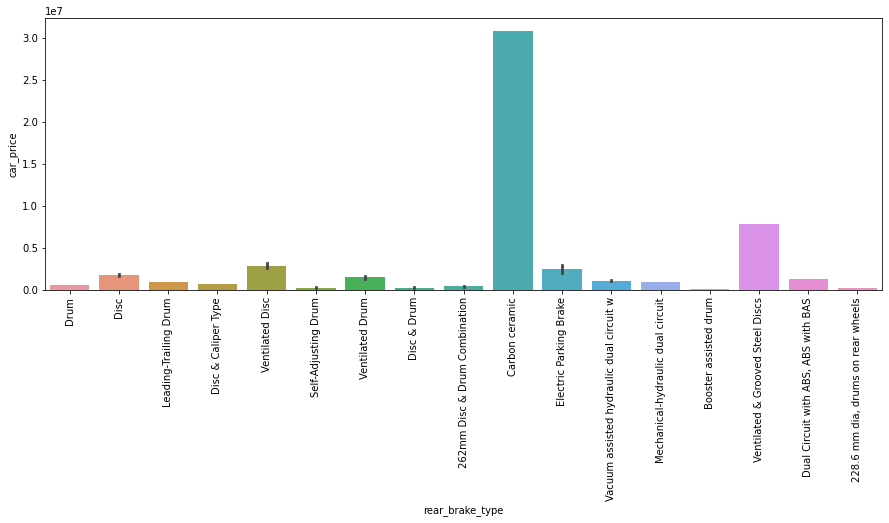

In [159]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['car_price'],x=df['rear_brake_type'])
plt.xticks(rotation=90)

Cars which have carbon ceramic rear brake are highest in price.

<AxesSubplot:xlabel='height', ylabel='car_price'>

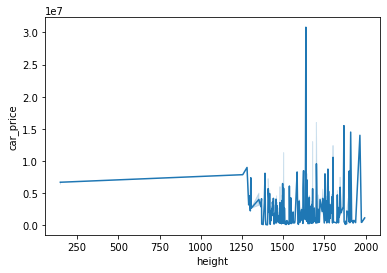

In [161]:
sns.lineplot(x=df['height'] , y=df['car_price'], data=df)

Cars with height around 1600 mm has the highest prices.

<AxesSubplot:xlabel='width', ylabel='car_price'>

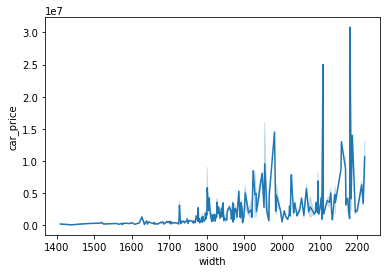

In [162]:
sns.lineplot(x=df['width'] , y=df['car_price'], data=df)

Car prices increases with the increase in the width of the car.

<AxesSubplot:xlabel='length', ylabel='car_price'>

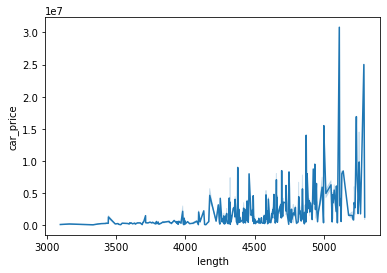

In [164]:
sns.lineplot(x=df['length'] , y=df['car_price'], data=df)

Car price increases with length of the car more than 5000 mm.

<AxesSubplot:xlabel='Weight', ylabel='car_price'>

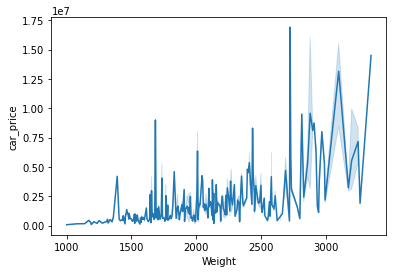

In [165]:
sns.lineplot(x=df['Weight'] , y=df['car_price'], data=df)

Car prices increases with the increase in the weight of the car.

<AxesSubplot:xlabel='top_speed', ylabel='car_price'>

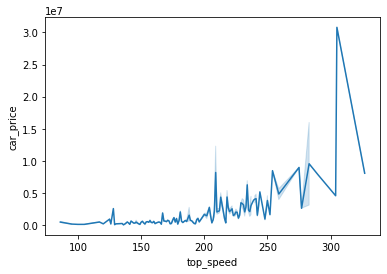

In [167]:
sns.lineplot(x=df['top_speed'] , y=df['car_price'], data=df)

With the increase in the speed of the car, prices also increases.

<AxesSubplot:xlabel='Manu_year', ylabel='car_price'>

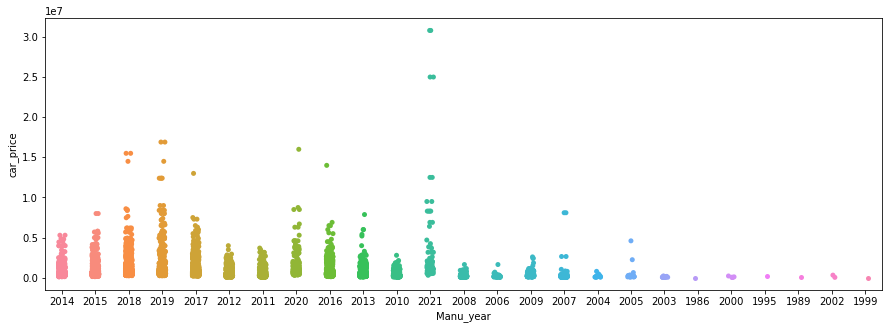

In [169]:
 plt.figure(figsize=(15,5))
sns.stripplot(x=df['Manu_year'] , y=df['car_price'])

With the increase in the years, prices decreases. That is, more old cars are less in price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Volkswagen'),
  Text(3, 0, 'Honda'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Chevrolet'),
  Text(9, 0, 'Mercedes-Benz'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Audi'),
  Text(12, 0, 'Jaguar'),
  Text(13, 0, 'Datsun'),
  Text(14, 0, 'Volvo'),
  Text(15, 0, 'Renault'),
  Text(16, 0, 'Jeep'),
  Text(17, 0, 'Tata'),
  Text(18, 0, 'Mini'),
  Text(19, 0, 'Kia'),
  Text(20, 0, 'Porsche'),
  Text(21, 0, 'Skoda'),
  Text(22, 0, 'Land'),
  Text(23, 0, 'MG'),
  Text(24, 0, 'Fiat'),
  Text(25, 0, 'Force'),
  Text(26, 0, 'Mitsubishi'),
  Text(27, 0, 'Lamborghini'),
  Text(28, 0, 'Isuzu'),
  Text(29, 0, 'Ambassador'),
  Text(30, 0, 'Lexus'),
  Text(31, 0, 'Bentley'),
  Text(32, 0, 'OpelCorsa'),
  Text(33, 0,

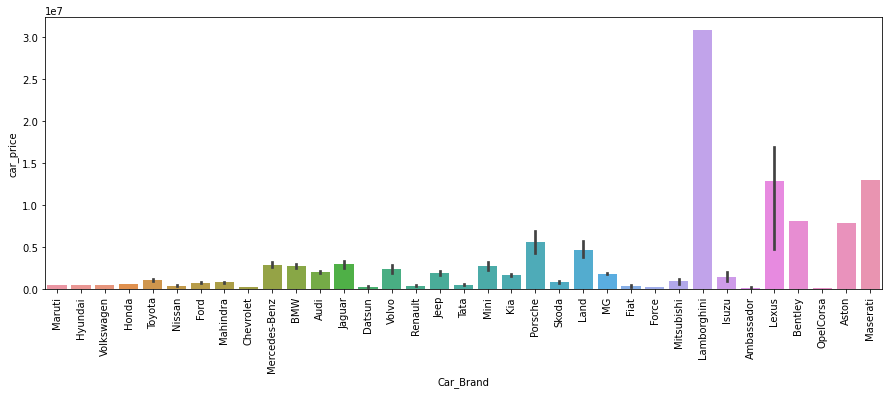

In [170]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['car_price'],x=df['Car_Brand'])
plt.xticks(rotation=90)

Lamborghini cars has the highest selling price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Delhi-NCR'),
  Text(4, 0, 'Gurgaon'),
  Text(5, 0, 'Hyderabad'),
  Text(6, 0, 'Jaipur'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Mumbai'),
  Text(9, 0, 'New-delhi'),
  Text(10, 0, 'Noida'),
  Text(11, 0, 'Pune')])

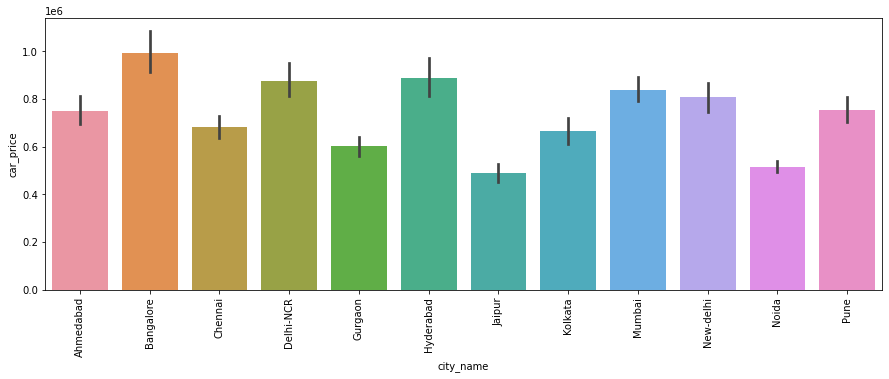

In [171]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['car_price'],x=df['city_name'])
plt.xticks(rotation=90)

Bangalore and hyderabad has the highest selling used cars.

# Multivariate Analysis :

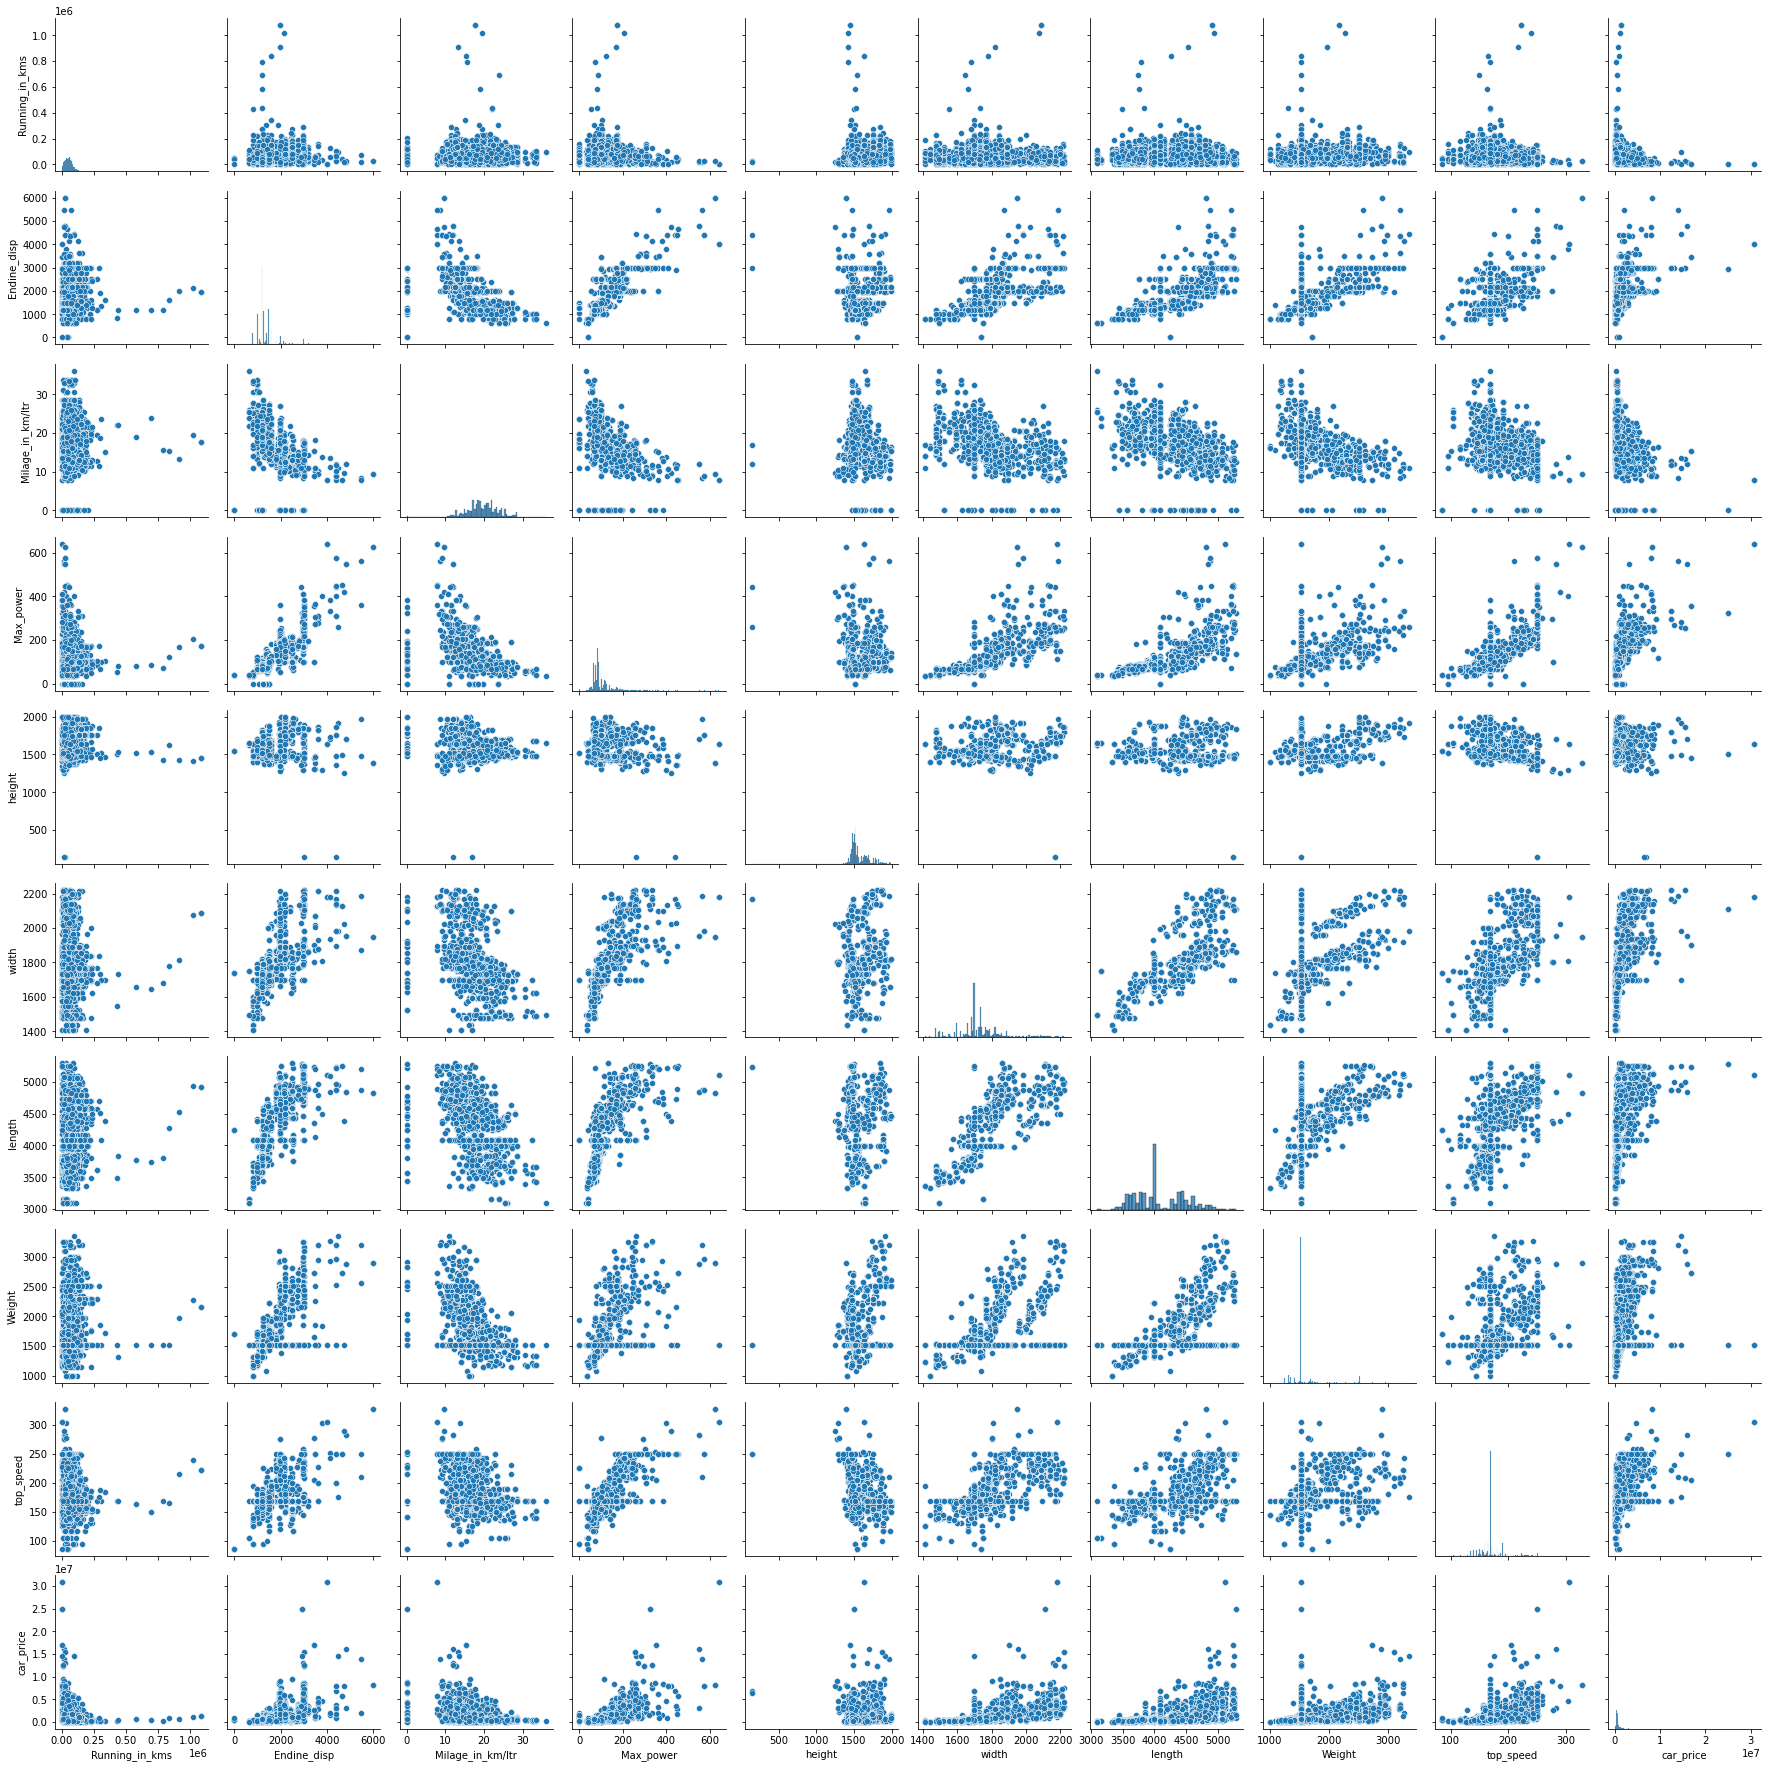

In [172]:
sns.pairplot(df)

# Label Encoder :

In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
le=LabelEncoder()

In [175]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])

In [176]:
df.head(10)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Manu_year,Car_Brand,Car_Model,city_name,car_price
0,4,131125.0,998.0,1,21.79,3,70,67.05,1,7,1675.0,1620.0,3655.0,1340.0,169.0,17,21,246,0,294000.0
1,4,73875.0,1197.0,1,18.90,3,176,82.00,1,7,1520.0,1660.0,3765.0,1520.0,165.0,18,11,110,0,480000.0
2,1,97922.0,1498.0,1,22.27,3,176,108.60,12,7,1467.0,1699.0,4390.0,1750.0,180.0,21,33,238,0,711000.0
3,4,24230.0,998.0,1,21.70,3,135,67.05,12,7,1564.0,1520.0,3565.0,1170.0,169.0,22,21,192,0,422000.0
4,4,41174.0,998.0,0,20.51,3,70,67.00,12,7,1700.0,1495.0,3599.0,1350.0,152.0,20,21,246,0,430000.0
5,4,57341.0,1196.0,1,16.11,3,176,72.42,1,7,1825.0,1475.0,3675.0,1510.0,169.0,15,21,80,0,279000.0
6,4,38647.0,1497.0,1,17.00,3,103,118.00,1,7,1480.0,1695.0,4420.0,1520.0,169.0,14,10,60,0,399000.0
7,4,17116.0,1196.0,1,16.11,3,176,72.42,1,7,1825.0,1475.0,3675.0,1510.0,169.0,23,21,80,0,472000.0
8,4,45347.0,1196.0,1,15.37,3,176,73.00,12,7,1800.0,1475.0,3675.0,1510.0,145.0,19,21,80,0,381000.0
9,4,45203.0,1197.0,1,20.40,3,176,81.80,12,7,1530.0,1735.0,3840.0,1315.0,165.0,19,21,214,0,464000.0


So all the features are converted into numeric form.

In [177]:
# Checking various factors of the dataset

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Fuel_type,12608.0,2.676793,1.497358e+00,0.0,1.00,4.0,4.00,4.0
Running_in_kms,12608.0,57722.588436,4.027723e+04,200.0,33000.00,55000.0,75862.25,1080000.0
Endine_disp,12608.0,1436.207249,4.948525e+02,0.0,1197.00,1248.0,1498.00,5998.0
Gear_transmission,12608.0,0.762056,4.258417e-01,0.0,1.00,1.0,1.00,1.0
Milage_in_km/ltr,12608.0,19.556908,4.220344e+00,0.0,17.01,19.6,22.07,36.0
Seating_cap,12608.0,3.217164,6.875363e-01,0.0,3.00,3.0,3.00,7.0
color,12608.0,119.638721,5.410431e+01,0.0,70.00,135.0,176.00,194.0
Max_power,12608.0,99.662231,4.511308e+01,0.0,74.00,86.8,113.40,641.0
front_brake_type,12608.0,5.456218,5.382077e+00,0.0,1.00,1.0,12.00,12.0
rear_brake_type,12608.0,6.875000,1.830854e+00,0.0,7.00,7.0,7.00,16.0


__Observations :__

   1. Some of the features has skewness, due the difference between mean and median of that features.
   2. Much outliers are present due to huge differences between the 75th percentile and the max value.

In [178]:
# Checking Skewness of the dataset

df.skew()

Fuel_type           -0.259515
Running_in_kms       7.906142
Endine_disp          1.903063
Gear_transmission   -1.230962
Milage_in_km/ltr    -0.511735
Seating_cap          2.496761
color               -0.585909
Max_power            2.796354
front_brake_type     0.388951
rear_brake_type      2.186202
height               0.983803
width                0.817710
length               0.439269
Weight               1.980285
top_speed            1.284831
Manu_year           -0.636592
Car_Brand            0.153633
Car_Model            0.011219
city_name           -0.017844
car_price            9.610453
dtype: float64

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__
    
    "Running_in_kms" and "car_price" are highly skewed
    
We can handle them later on using power transformation.

# Detecting Outliers :

Fuel_type               AxesSubplot(0.125,0.749828;0.168478x0.130172)
Running_in_kms       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Endine_disp          AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Gear_transmission    AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Milage_in_km/ltr        AxesSubplot(0.125,0.593621;0.168478x0.130172)
Seating_cap          AxesSubplot(0.327174,0.593621;0.168478x0.130172)
color                AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Max_power            AxesSubplot(0.731522,0.593621;0.168478x0.130172)
front_brake_type        AxesSubplot(0.125,0.437414;0.168478x0.130172)
rear_brake_type      AxesSubplot(0.327174,0.437414;0.168478x0.130172)
height               AxesSubplot(0.529348,0.437414;0.168478x0.130172)
width                AxesSubplot(0.731522,0.437414;0.168478x0.130172)
length                  AxesSubplot(0.125,0.281207;0.168478x0.130172)
Weight               AxesSubplot(0.327174,0.281207;0.168478x0.130172)
top_speed           

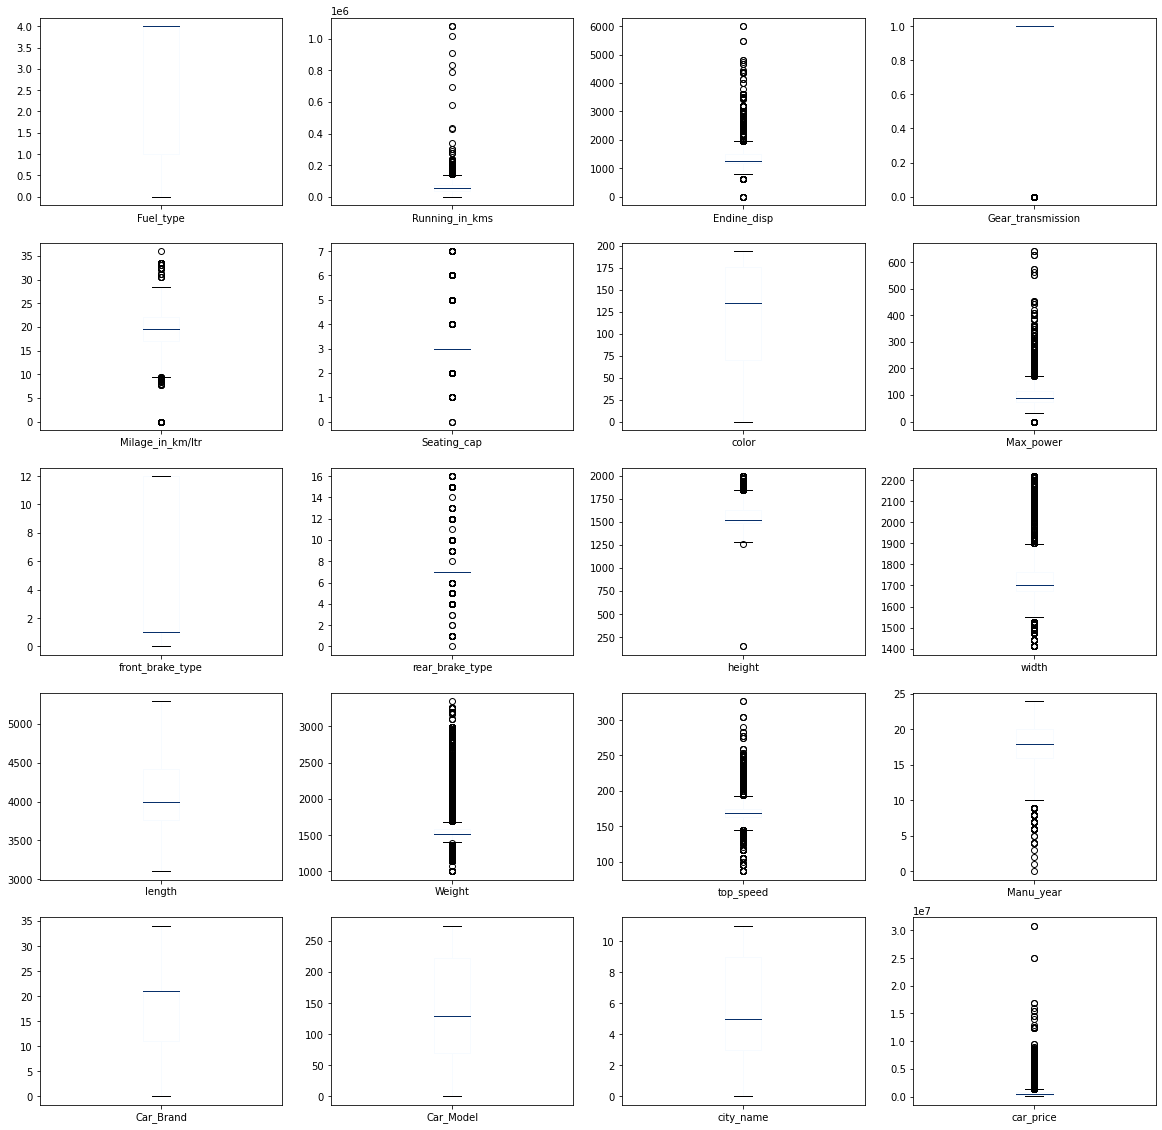

In [179]:
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,20), colormap='Blues')

Lots of outliers can be observed here.

In [180]:
# Importing required zscore library

from scipy.stats import zscore

In [181]:
z=np.abs(zscore(df))

In [182]:
threshold=3

In [183]:
df_new=df[(z<3).all(axis=1)] 

In [184]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (12608, 20)


In [185]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (11323, 20)


In [186]:
# Data loss percentage

loss=((12608-11323)/12608)*100
print('Data loss percentage ',loss)

Data loss percentage  10.191941624365482


So, we have successfully removed the outliers, with 10% data loss.

In [187]:
df=df_new

__Spliting the dataset :__

In [189]:
# Data part

x=df.drop(['car_price'],axis=1)

In [190]:
x.head(1)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Manu_year,Car_Brand,Car_Model,city_name
0,4,131125.0,998.0,1,21.79,3,70,67.05,1,7,1675.0,1620.0,3655.0,1340.0,169.0,17,21,246,0


In [191]:
# Target

y=df.car_price

In [192]:
y.head(1)

0    294000.0
Name: car_price, dtype: float64

# Feature Scaling :
To transform the dataset into same format, so that we have a uniform dataset.

In [196]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [197]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Manu_year,Car_Brand,Car_Model,city_name
0,0.813660,2.534495,-1.008979,0.496050,0.458285,-0.279164,-0.939702,-0.838051,-0.797355,0.305847,1.342194,-0.788658,-1.071078,-0.882771,-0.028277,-0.343949,0.380278,1.118755,-1.631638
1,0.813660,0.621381,-0.420382,0.496050,-0.358995,-0.279164,1.065550,-0.333917,-0.797355,0.305847,-0.353289,-0.400687,-0.756663,-0.139254,-0.268791,-0.006614,-0.875706,-0.459287,-1.631638
2,-1.220729,1.424956,0.469907,0.496050,0.594027,-0.279164,1.065550,0.563072,1.259155,0.305847,-0.933034,-0.022415,1.029788,0.810797,0.633136,1.005391,1.887459,1.025929,-1.631638
3,0.813660,-1.037597,-1.008979,0.496050,0.432833,-0.279164,0.289934,-0.838051,1.259155,0.305847,0.128010,-1.758587,-1.328327,-1.584982,-0.028277,1.342726,0.380278,0.492179,-1.631638
4,0.813660,-0.471383,-1.008979,-2.015925,0.096306,-0.279164,-0.939702,-0.839737,1.259155,0.305847,1.615659,-2.001069,-1.231144,-0.841465,-1.050461,0.668056,0.380278,1.118755,-1.631638
5,0.813660,0.068867,-0.423340,0.496050,-1.147996,-0.279164,1.065550,-0.656967,-0.797355,0.305847,2.982984,-2.195055,-1.013911,-0.180560,-0.028277,-1.018618,0.380278,-0.807385,-1.631638
6,0.813660,-0.555827,0.466949,0.496050,-0.896308,-0.279164,-0.315425,0.880052,-0.797355,0.305847,-0.790833,-0.061212,1.115537,-0.139254,-0.028277,-1.355953,-1.001304,-1.039450,-1.631638
7,0.813660,-1.275325,-0.423340,0.496050,-1.147996,-0.279164,1.065550,-0.656967,-0.797355,0.305847,2.982984,-2.195055,-1.013911,-0.180560,-0.028277,1.680061,0.380278,-0.807385,-1.631638
8,0.813660,-0.331934,-0.423340,0.496050,-1.357265,-0.279164,1.065550,-0.637409,1.259155,0.305847,2.709519,-2.195055,-1.013911,-0.180560,-1.471360,0.330721,0.380278,-0.807385,-1.631638
9,0.813660,-0.336746,-0.420382,0.496050,0.065198,-0.279164,1.065550,-0.340661,1.259155,0.305847,-0.243903,0.326760,-0.542289,-0.986038,-0.268791,0.330721,0.380278,0.747451,-1.631638


# Power Transformation :
I will use Yeo-Johnson to transform this continuous dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [198]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [199]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Manu_year,Car_Brand,Car_Model,city_name
0,0.815227,2.164803,-1.242987,0.496050,0.478057,-0.182209,-1.008191,-0.903951,-0.799400,0.237505,1.342029,-0.786284,-1.129023,-1.123413,0.066104,-0.451437,0.435036,1.117877,-1.6241
1,0.815227,0.695458,-0.301230,0.496050,-0.337708,-0.182209,1.198966,-0.212132,-0.799400,0.237505,-0.133320,-0.391147,-0.733037,0.067851,-0.191555,-0.124635,-0.873311,-0.456743,-1.6241
2,-1.225693,1.356198,0.687063,0.496050,0.609789,-0.182209,1.198966,0.714027,1.257901,0.237505,-1.222219,-0.009881,1.038843,0.996864,0.699202,1.050775,1.769437,1.025660,-1.6241
3,0.815227,-1.090941,-1.242987,0.496050,0.453259,-0.182209,0.116288,-0.903951,1.257901,0.237505,0.485592,-1.787231,-1.468364,-2.631080,0.066104,1.495585,0.435036,0.494609,-1.6241
4,0.815227,-0.403215,-1.242987,-2.015925,0.122055,-0.182209,-1.008191,-0.906455,1.257901,0.237505,1.472862,-2.039775,-1.338626,-1.045923,-1.122111,0.630111,0.435036,1.117877,-1.6241


# Variance Inflation Factor :

__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

In [193]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [201]:
vif_calc()

    VIF Factor           Features
0     3.323261          Fuel_type
1     1.839507     Running_in_kms
2     7.022393        Endine_disp
3     1.326091  Gear_transmission
4     3.242415   Milage_in_km/ltr
5     1.418375        Seating_cap
6     1.016129              color
7     4.248107          Max_power
8     1.156435   front_brake_type
9     1.385698    rear_brake_type
10    1.699335             height
11    3.570824              width
12    4.816342             length
13    2.656292             Weight
14    2.258102          top_speed
15    2.056072          Manu_year
16    1.172370          Car_Brand
17    1.185090          Car_Model
18    1.004647          city_name


# Machine Learning Models :
Here we have a linear case, hence we'll go with Linear Regression and various other regression models.

In [220]:
# Importing the necessary libraries :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Finding best random state :

In [203]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.7207552248351621 on random state 517


# Required Evaluation Metrices :

In [204]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=517)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)
    
     
    # Difference between r2 score and cv score
    diff = r2-cv
    print("Difference between r2 Score and Cross Validation Score is", diff)

Now we can call all the models one by one using this function :

In [205]:
# Linear Regression

model=LinearRegression()
reg(model,x,y)

Mean Square Error Score is: 230336.85253686857
r2 Score is: 72.07552248351621
Cross Validation Score: 67.26636037801423
Difference between r2 Score and Cross Validation Score is 4.809162105501983


In [206]:
# Ridge Regression

model=Ridge(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 230335.14250853081
r2 Score is: 72.07593710644858
Cross Validation Score: 67.2688835899973
Difference between r2 Score and Cross Validation Score is 4.807053516451276


In [207]:
# Lasso Regression

model=Lasso(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 230336.85007401608
r2 Score is: 72.07552308067527
Cross Validation Score: 67.26636241522795
Difference between r2 Score and Cross Validation Score is 4.8091606654473225


In [208]:
# ElasticNet

model=ElasticNet (alpha=0.0001)
reg(model,x,y)

Mean Square Error Score is: 230336.73394525694
r2 Score is: 72.07555123799385
Cross Validation Score: 67.26650326760651
Difference between r2 Score and Cross Validation Score is 4.80904797038734


In [209]:
# Support Vector Regression (poly)

model=SVR(kernel='poly', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 451493.65647025313
r2 Score is: -7.2905583554639275
Cross Validation Score: -6.56081968890621
Difference between r2 Score and Cross Validation Score is -0.7297386665577177


In [210]:
# Support Vector Regression (linear)

model=SVR(kernel='linear', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 434585.36660165084
r2 Score is: 0.5949616818334391
Cross Validation Score: 1.2033227774173128
Difference between r2 Score and Cross Validation Score is -0.6083610955838736


In [211]:
# Support Vector Regression (rbf)

model=SVR(kernel='rbf', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 452394.4195396327
r2 Score is: -7.719090524602956
Cross Validation Score: -6.988631901943262
Difference between r2 Score and Cross Validation Score is -0.7304586226596941


In [212]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

Mean Square Error Score is: 180844.9920769923
r2 Score is: 82.78642113831684
Cross Validation Score: 81.94287214798932
Difference between r2 Score and Cross Validation Score is 0.8435489903275197


In [213]:
# Random Forest Regressor

model=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 93264.48519933417
r2 Score is: 95.42184181365398
Cross Validation Score: 92.92337842946212
Difference between r2 Score and Cross Validation Score is 2.498463384191865


In [214]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2)
reg(model,x,y)

Mean Square Error Score is: 93264.48519933417
r2 Score is: 95.42184181365398
Cross Validation Score: 92.92337842946212
Difference between r2 Score and Cross Validation Score is 2.498463384191865


In [215]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(n_estimators=120)
reg(model,x,y)

Mean Square Error Score is: 96253.20881848311
r2 Score is: 95.123720024517
Cross Validation Score: 91.72886573316438
Difference between r2 Score and Cross Validation Score is 3.3948542913526154


In [216]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 302606.8953229101
r2 Score is: 51.803462463983216
Cross Validation Score: 56.11722882893668
Difference between r2 Score and Cross Validation Score is -4.313766364953466


In [217]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=300)
reg(model,x,y)

Mean Square Error Score is: 80223.9491520162
r2 Score is: 96.61260163301473
Cross Validation Score: 94.1813671074118
Difference between r2 Score and Cross Validation Score is 2.4312345256029317


After finding all the scores of various models, we found that ExtraTreesRegressor model gives the highest r2 score. Hence we choose this model and proceed further with the process.

# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of ExtraTreesRegressor Model

In [ ]:
ExtraTreesRegressor(n_estimators=300,
    criterion={"squared_error", "absolute_error"},
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features={"auto", "sqrt", "log2"},
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,)

These are the various parameters for ExtraTreesRegressor, which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [218]:
params={'n_estimators':[300],
    'criterion':["squared_error", "absolute_error"],
    'max_features':["auto", "sqrt", "log2"]}

# Here i have taken only some parameters as it was taking a long time to execute all of them.

In [221]:
grid=GridSearchCV(ExtraTreesRegressor(), params, cv=5)

In [222]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300]})

In [223]:
grid.best_params_

{'criterion': 'absolute_error', 'max_features': 'auto', 'n_estimators': 300}

So here we have found the best parameters for our model, and now we can finally train our model.

In [224]:
ETR=ExtraTreesRegressor(criterion='absolute_error', max_features='auto', n_estimators=300)

In [225]:
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
r2=r2_score(y_test, pred)*100
print('r2 score for the final model : ',r2)

r2 score for the final model :  96.48965467469864


# Saving the best model :

In [226]:
import pickle
filename='Car_Price.pkl'
pickle.dump(ETR,open(filename,'wb'))

# Predictions :

In [227]:
prediction = ETR.predict(x_test)
prediction

array([ 605000.        ,  387800.        ,  601763.33333333, ...,
        627750.        ,  443560.        , 1717170.        ])

In [231]:
pd.DataFrame([prediction[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,6.050000e+05,605000.0
1,3.878000e+05,388000.0
2,6.017633e+05,637000.0
3,4.990000e+05,499000.0
4,9.028800e+05,918000.0
...,...,...
2260,4.395567e+05,570000.0
2261,2.874000e+05,295000.0
2262,6.277500e+05,705000.0
2263,4.435600e+05,410000.0


Here we have achieved the predicted and actual values in a dataframe. They are mostly similar.

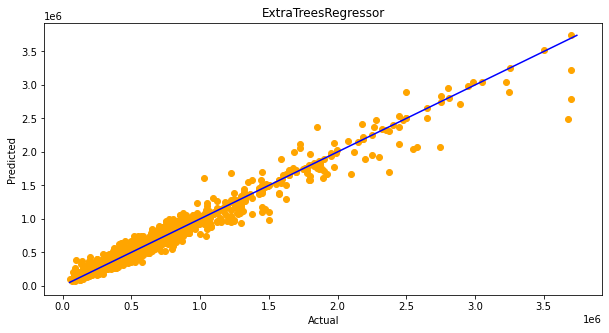

In [232]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, color='orange')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("ExtraTreesRegressor")
plt.show()

Blue line denotes the actual values and the orange dots are the predicted values.

# THANK YOU.